In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr



In [ ]:
df = pdr.get_data_tiingo('GOOGL', api_key='260feaa1e19f50704469374f1cb0031efcc887ab')
df.head()

close    high  ...  divCash  splitFactor
symbol date                                       ...                      
GOOGL  2016-04-11 00:00:00+00:00  757.54  767.22  ...      0.0          1.0
       2016-04-12 00:00:00+00:00  764.32  764.92  ...      0.0          1.0
       2016-04-13 00:00:00+00:00  771.91  775.75  ...      0.0          1.0
       2016-04-14 00:00:00+00:00  775.39  779.61  ...      0.0          1.0
       2016-04-15 00:00:00+00:00  780.00  780.93  ...      0.0          1.0

[5 rows x 12 columns]

In [ ]:
df.tail()

close       high  ...  divCash  splitFactor
symbol date                                           ...                      
GOOGL  2021-04-05 00:00:00+00:00  2218.96  2228.9900  ...      0.0          1.0
       2021-04-06 00:00:00+00:00  2209.26  2228.0000  ...      0.0          1.0
       2021-04-07 00:00:00+00:00  2239.03  2244.5000  ...      0.0          1.0
       2021-04-08 00:00:00+00:00  2250.43  2271.7899  ...      0.0          1.0
       2021-04-09 00:00:00+00:00  2270.67  2273.9700  ...      0.0          1.0

[5 rows x 12 columns]

In [ ]:
df_close=df.reset_index()['close']
df_close

0        757.54
1        764.32
2        771.91
3        775.39
4        780.00
         ...   
1254    2218.96
1255    2209.26
1256    2239.03
1257    2250.43
1258    2270.67
Name: close, Length: 1259, dtype: float64

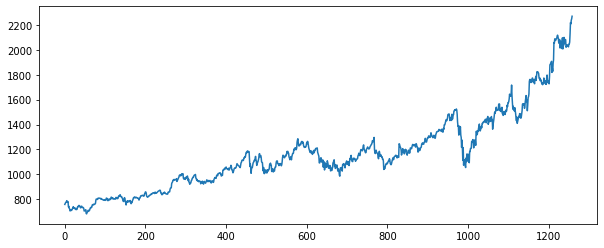

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_close)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [ ]:
df_close

array([[0.04806452],
       [0.05232993],
       [0.05710493],
       ...,
       [0.98009474],
       [0.98726668],
       [1.        ]])

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df_close)*0.65)
test_size=len(df_close)-training_size
train_data,test_data=df_close[0:training_size,:],df_close[training_size:len(df_close),:1]



In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
import numpy
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:

print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [ ]:

print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Epoch 1/150
12/12 [==============================] - 36s 125ms/step - loss: 0.0229 - val_loss: 0.0573
Epoch 2/150
12/12 [==============================] - 0s 23ms/step - loss: 0.0034 - val_loss: 0.0106
Epoch 3/150
12/12 [==============================] - 0s 18ms/step - loss: 0.0017 - val_loss: 0.0200
Epoch 4/150
12/12 [==============================] - 0s 19ms/step - loss: 8.5007e-04 - val_loss: 0.0109
Epoch 5/150
12/12 [==============================] - 0s 19ms/step - loss: 6.9343e-04 - val_loss: 0.0050
Epoch 6/150
12/12 [==============================] - 0s 19ms/step - loss: 5.7081e-04 - val_loss: 0.0049
Epoch 7/150
12/12 [==============================] - 0s 21ms/step - loss: 5.9669e-04 - val_loss: 0.0061
Epoch 8/150
12/12 [==============================] - 0s 22ms/step - loss: 5.4529e-04 - val_loss: 0.0066
Epoch 9/150
12/12 [==============================] - 0s 22ms/step - loss: 5.4865e-04 - val_loss: 0.0059
Epoch 10/150
12/12 [==============================] - 0s 21ms/step - loss:

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1034.6333009670088

In [ ]:

### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1542.211271729227

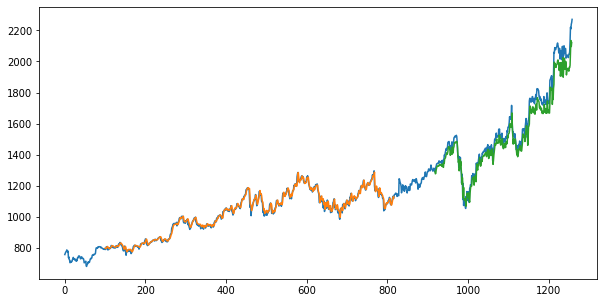

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_close)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

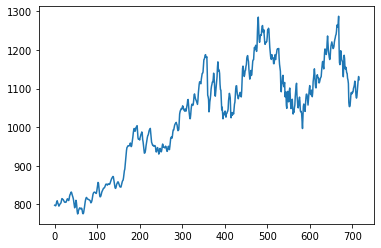

In [ ]:
plt.plot(train_predict)

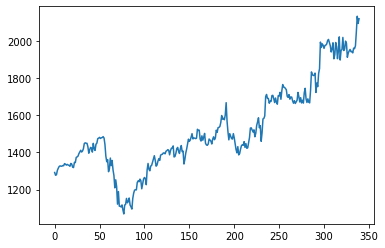

In [ ]:
plt.plot(test_predict)

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.6864419042106786,
 0.6875554409164972,
 0.6797732663114253,
 0.6665492315338497,
 0.6778292954521148,
 0.6638691940384893,
 0.6583203840128842,
 0.68118248790523,
 0.681327184765308,
 0.6957276679269973,
 0.6752058784672199,
 0.700974501896787,
 0.7196026498398898,
 0.7176335143092611,
 0.7188414185325223,
 0.7146074625832792,
 0.7110214969204733,
 0.6899649581951897,
 0.6835416758412864,
 0.6880398608393676,
 0.6738595685517101,
 0.6794083785773153,
 0.6769611142916461,
 0.6664674463520663,
 0.6574773675237335,
 0.6627242014935233,
 0.6537026668260428,
 0.6587418922574597,
 0.6624725547803438,
 0.6875114027416909,
 0.6773197108579265,
 0.663787408856706,
 0.6740986329292307,
 0.657420747013268,
 0.6661780526319101,
 0.6553761174686858,
 0.6877504671192112,
 0.7025284203506696,
 0.6763949091869923,
 0.6645297666605852,
 0.6707076934691387,
 0.660434216403591,
 0.6583581310198612,
 0.6941234201304789,
 0.7542669845803476,
 0.7568337810547772,
 0.7621246531993733,
 0.7632067340660447,

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9208241]
101
1 day input [0.68755544 0.67977327 0.66654923 0.6778293  0.66386919 0.65832038
 0.68118249 0.68132718 0.69572767 0.67520588 0.7009745  0.71960265
 0.71763351 0.71884142 0.71460746 0.7110215  0.68996496 0.68354168
 0.68803986 0.67385957 0.67940838 0.67696111 0.66646745 0.65747737
 0.6627242  0.65370267 0.65874189 0.66247255 0.6875114  0.67731971
 0.66378741 0.67409863 0.65742075 0.66617805 0.65537612 0.68775047
 0.70252842 0.67639491 0.66452977 0.67070769 0.66043422 0.65835813
 0.69412342 0.75426698 0.75683378 0.76212465 0.76320673 0.77180676
 0.71580908 0.73736262 0.72110624 0.7624455  0.77883399 0.86675936
 0.86345649 0.8856014  0.88288991 0.87714607 0.88412298 0.88555107
 0.88950193 0.89936019 0.90434279 0.89628381 0.88558882 0.86385284
 0.86753946 0.88244324 0.83975137 0.84350091 0.87354124 0.87028241
 0.83689518 0.85106289 0.89078533 0.83443534 0.85510811 0.8524847
 0.89296836 0.8611728  0.86396608 0.88249357 0.88144294 0.84314231
 0.84667795 0.84902455 0.85571836 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

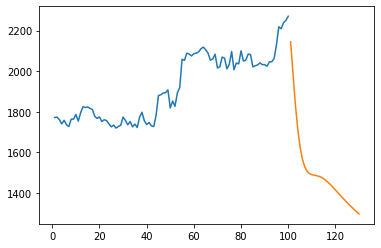

In [ ]:

plt.plot(day_new,scaler.inverse_transform(df_close[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

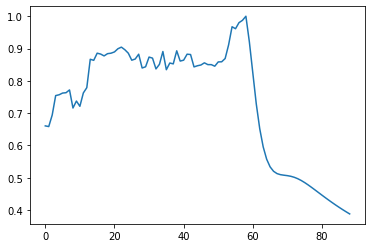

In [ ]:

df3=df_close.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:

df3=scaler.inverse_transform(df3).tolist()

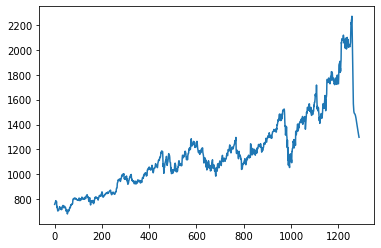

In [ ]:
plt.plot(df3)

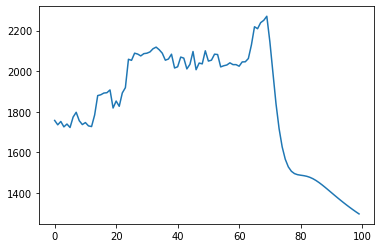

In [ ]:
plt.plot(df3[len(df3)-100:])